In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix,roc_curve,roc_auc_score
import io
import requests


import warnings
warnings.filterwarnings('ignore')

#import all the necessary liabriries requried if needed with insert more 

In [2]:
df = pd.read_csv('raw.githubusercontent.com_dsrscientist_dataset4_main_Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.info()
#object data is there

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [4]:
df.isnull().sum()
#null value checked there is many null value 

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [5]:
df.isnull().sum().sum()
#overall null value in dataset

425

In [6]:
df.replace(np.nan,0, inplace = True)
df.head(10)
#Replaced all null value from data set 

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [7]:
df.columns
#all column name 

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [8]:
#few header name is npt proper thet are very vary from each other so we can balance the same 
df.rename(columns={'HS-105/12':'HS-105','HS-205/20':'HS-205'})

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [9]:

input = df.drop(["CS-403","CS-421","CS-406","CS-414","CS-419","CS-423","CS-412", 'MT-442',"CGPA"], axis=1)
target = df[["CGPA"]]
#all fourth year data and undernecassary columns in there because needs to predict and uncessary column will get drop

In [10]:
df['CGPA'].head()
#target variable

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64

In [11]:
df['PH-121'].unique()
#in all the lins common value is these only you can check below code also hence the alphabates is vary up and down  according to grade 

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [12]:
df['HS-101'].unique()
#in all the lins common value is these only you can check above  code also hence the alphabates is vary up and down  according to grade 

array(['D+', 'D', 'B', 'C+', 'A-', 'B-', 'C-', 'B+', 'C', 'A', 'A+', 'F'],
      dtype=object)

In [13]:
for i in df.columns:
    x = df[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: Seat No. and it value is:
 CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64

Column name is: PH-121 and it value is:
 A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

Column name is: HS-101 and it value is:
 A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64

Column name is: CY-105 and it value is:
 A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
0       1
F       1
Name: CY-105, dtype: int64

Column name is: HS-105/12 and it value is:
 A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
0      1
F      1
Name

In [14]:
#These grades are consistent to be fair, they have a meaning but for simplicity I removed them ; generally we should'nt since they hold a meaning and have their own weight in prediction of target.

for i in df.columns:
    df.drop(df[(df.loc[:,i]=='WU') | (df.loc[:,i]=='w')].index)

In [15]:
#we can conecvert object into integeger

In [16]:
grades_enc = {'B-':2.7, 'A':4, 'D':1.0, 'A-':3.7, 'B+':3.4, 'B':3.0, 'C+':2.4, 'C':2.0, 'C-':1.7, 'D+':1.4, 'WU':0.0, 'A+':4,'F':0.0,'W':0,'I':0}

#Inintalizing the graded according to CGPA top to bottom according to rank 

In [17]:

for item in input:
      input[item] = input[item].replace(grades_enc)

input.head()
#initalizing the data again

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,CS-97001,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,...,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7
1,CS-97002,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,...,1.0,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0
2,CS-97003,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,...,2.4,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0
3,CS-97004,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,...,1.0,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0
4,CS-97005,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,...,1.7,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4


In [18]:

# Concating inputs and targets for data insights
df = pd.concat([input, target], axis=1)
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
0,CS-97001,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,...,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7,2.205
1,CS-97002,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,...,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0,2.008
2,CS-97003,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,...,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0,3.608
3,CS-97004,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,...,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0,1.906
4,CS-97005,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,...,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,...,3.7,3.7,4.0,4.0,4.0,4.0,3.4,3.7,3.7,3.798
567,CS-97568,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,3.7,3.4,3.4,3.772
568,CS-97569,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,...,2.7,3.4,3.4,4.0,3.0,2.4,3.4,3.7,3.0,3.470
569,CS-97570,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,...,2.0,2.0,2.4,1.7,1.0,2.7,3.4,1.0,3.0,2.193


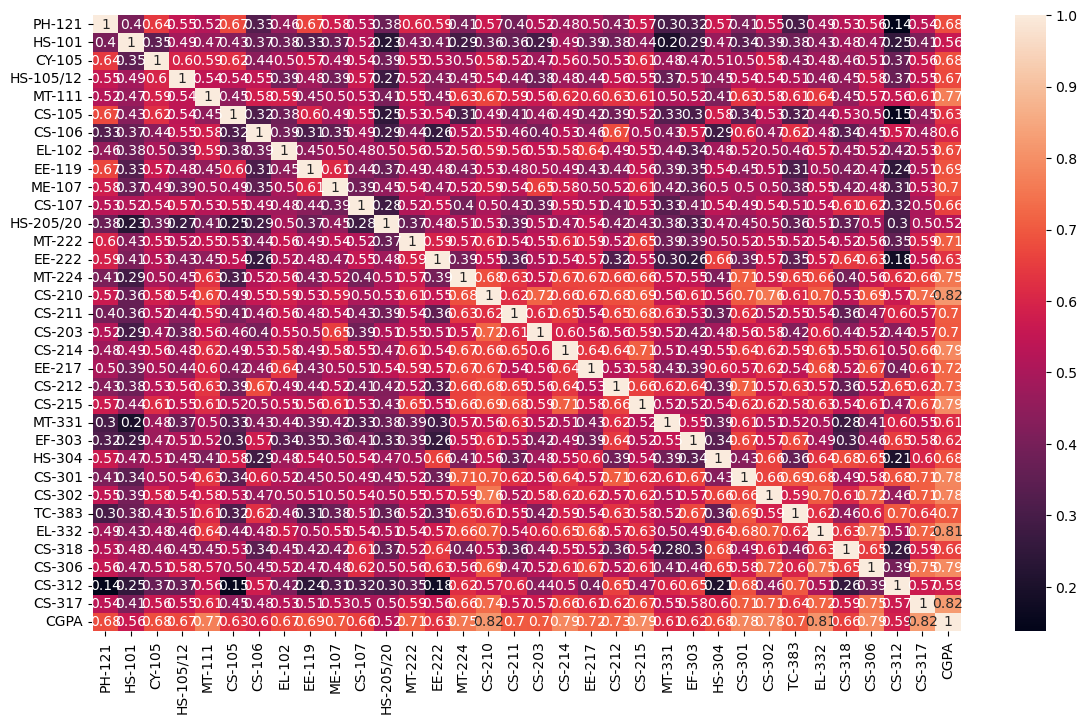

In [19]:
df_corr = df.corr().abs()

plt.figure(figsize=(14,8))
sns.heatmap(df_corr,annot=True)
plt.show()
# the heat map looks complicated but just focus on the last column the correlation of all the course GPAs are pretty strong as it should 
#all the course GPAs are pretty strong as it should be.

In [20]:
df.describe()
#no null value is there 
#All Max is same
#Min Max everything is normal we dont have to do anything

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.018389,2.628371,3.262697,2.878984,2.988091,3.329247,2.961996,2.969877,3.020140,2.698599,...,2.761646,2.850788,3.050088,2.873730,2.863748,2.628371,2.892119,2.892294,2.651138,2.954888
std,0.971594,0.908402,0.932997,1.019208,0.954343,0.799826,0.869226,0.981676,0.839463,1.029323,...,0.955712,0.970483,0.877124,1.017053,1.009585,1.035205,0.989909,1.095450,0.952455,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.400000,2.000000,2.700000,2.000000,2.400000,3.000000,2.400000,2.400000,2.400000,1.700000,...,2.000000,2.000000,2.700000,2.000000,2.000000,2.000000,2.400000,2.000000,2.000000,2.538000
50%,3.400000,2.700000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,2.700000,...,3.000000,3.000000,3.400000,3.000000,3.000000,2.700000,3.000000,3.000000,2.700000,3.029000
75%,3.700000,3.400000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,3.700000,3.700000,3.700000,3.700000,3.700000,3.400000,3.700000,4.000000,3.400000,3.451000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    float64
 2   HS-101     571 non-null    float64
 3   CY-105     571 non-null    float64
 4   HS-105/12  571 non-null    float64
 5   MT-111     571 non-null    float64
 6   CS-105     571 non-null    float64
 7   CS-106     571 non-null    float64
 8   EL-102     571 non-null    float64
 9   EE-119     571 non-null    float64
 10  ME-107     571 non-null    float64
 11  CS-107     571 non-null    float64
 12  HS-205/20  571 non-null    float64
 13  MT-222     571 non-null    float64
 14  EE-222     571 non-null    float64
 15  MT-224     571 non-null    float64
 16  CS-210     571 non-null    float64
 17  CS-211     571 non-null    float64
 18  CS-203     571 non-null    float64
 19  CS-214     571 non-null    float64
 20  EE-217    

In [22]:

# Splitting file into different columns based on our model prediction requirement first , secong and thrid year
model_1 = []
year_2 = []
year_3 = []
for item in [input]:
     for i in item:
        if i[3]=='1':
            model_1.append(i)
        elif i[3]=='2':
            year_2.append(i)
        else:
            year_3.append(i)

year_2_model = model_1 + year_2
year_3_model = year_2 + year_3

In [23]:

# Input data
labels = df['CGPA'].values
features = df[list(model_1)].values

In [24]:

#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression ,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [25]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [26]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(x_train, y_train)

# Prediction:
y_pred = LinearRegression.predict(x_test)
y_train_p = LinearRegression.predict(x_train)


# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score: 0.8060916141008817
mean_squared_error: 0.0657104929216481
Squareroot_mean_squared_error 0.2563405799354603


In [27]:
test_score =  LinearRegression.score(x_train,y_train)
test_score
#test score

0.8734930885632656

In [28]:
compare={"Actual": y_test, "Predict": y_pred}
pd.DataFrame(compare)
#copmring acutal cgpa vs predcted cgpa

,Actual,Predict
0,1.992,2.138289
1,3.490,3.382699
2,2.823,2.690657
3,2.288,2.397922
4,3.816,3.662954
...,...,...
167,3.578,3.364355
168,1.764,1.717218
169,3.369,3.548431
170,3.919,3.761858


In [29]:

# Visualize the Result in one more way
idx= np.random.choice(x_test.shape[0])
print ("Predicted CGPA :", y_test[idx])
print ("Actual CGPA :", y_test[idx])
     

Predicted CGPA : 3.369
Actual CGPA : 3.369


In [30]:
from sklearn.metrics import mean_squared_error , mean_absolute_error


# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_p)
mae_train = mean_absolute_error(y_train, y_train_p)
print('performance for traning')
print('RMSE is :',(np.sqrt(mse_train)))
print('MAE is :',(mae_train))
print("---------------------------------------")

performance for traning
RMSE is : 0.22501331665662536
MAE is : 0.17585479617478914
---------------------------------------


In [31]:
# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_pred) 
mae_test = mean_absolute_error(y_test, y_pred) 
print("performance for testing ")
print('RMSE is :',(np.sqrt(mse_test)))
print('MAE is :',(mae_test))
print("---------------------------------------")

performance for testing 
RMSE is : 0.2563405799354603
MAE is : 0.19844121708333012
---------------------------------------


In [32]:

print("---------------------------------------")
test_score= LinearRegression.score(x_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

---------------------------------------
The score of model for testing set
Test score 0.81


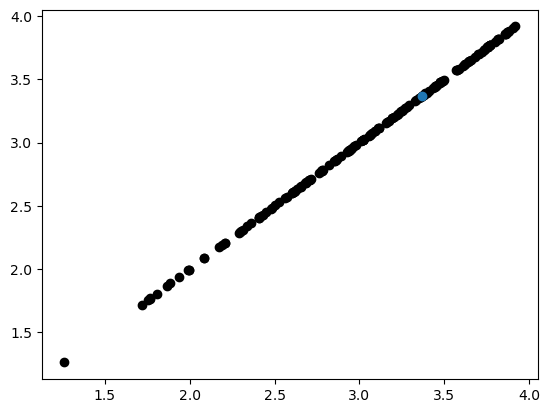

In [33]:

# visualization
plt.scatter(y_test, y_test,  color='black')
plt.scatter(y_test[idx], y_test[idx])

In [34]:
#prediction for first two year for CGPA
#Input data
labels = df['CGPA'].values
features = df[list(year_2_model)].values

In [35]:
# Split data train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [36]:

# Build a Model

from sklearn import linear_model

# Bulid a new Model
year2 = linear_model.LinearRegression()

# Train the Model
year2.fit(X_train, y_train)

LinearRegression()

In [37]:


# Predict


# Predict for training set
y_t_predict = year2.predict(X_train)

# Predict for training set
y_test_predict = year2.predict(X_test)

In [38]:
# model evaluation for training set
mse_train = mean_squared_error(y_train, y_t_predict)
mae_train = mean_absolute_error(y_train, y_t_predict)
print("performance for training set")
print('RMSE is :',(np.sqrt(mse_train)))
print('MAE is :',format(mae_train))
print("---------------------------------------")

performance for training set
RMSE is : 0.18419555052213302
MAE is : 0.1324694442942729
---------------------------------------


In [39]:
# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("performance for testing set")
print('RMSE is :',(np.sqrt(mse_test)))
print('MAE is:',(mae_test))

performance for testing set
RMSE is : 0.16246826936670716
MAE is: 0.1277222920815317


In [40]:
print("---------------------------------------")
test_score= year2.score(X_test, y_test)# Return R2 score . The best possible score is 1.0  
print(" score model for testing set")
print('Test score :',(test_score.round(2)))

---------------------------------------
 score model for testing set
Test score : 0.93


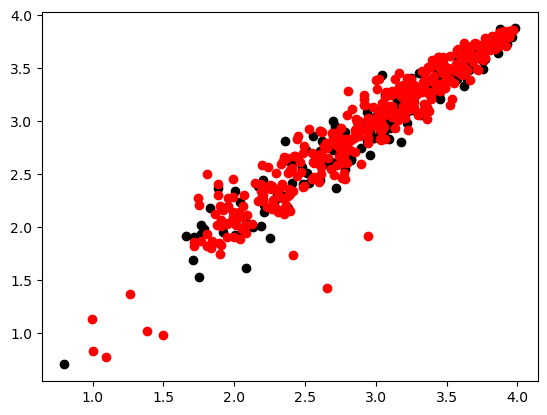

In [41]:

# visualization
plt.scatter(y_test, y_test_predict,  color='black')
plt.scatter(y_train,y_t_predict,color='Red')

In [42]:
#prediction for first three year for CGPA
#Input data
labels = df['CGPA'].values
features = df[list(year_3_model)].values



In [43]:
# Split data train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
     

In [52]:



# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_pred) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_pred) # Return the loss it is non-negative . The best value is 0.0
print("performance for testing set")
print('RMSE is :',(np.sqrt(mse_test)))
print('MAE is:',(mae_test))

performance for testing set
RMSE is : 0.2720919819651239
MAE is: 0.20951831395348838


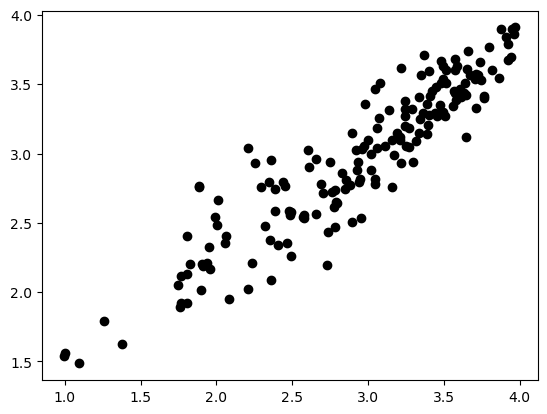

In [53]:

# visualization
plt.scatter(y_test, y_pred,  color='black')

In [54]:
#prediction for first  year for CGPA
#Input data
labels = df['CGPA'].values
features = df[list(model_1)].values

In [47]:
# Split data train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [55]:

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [56]:
# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_pred) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_pred) # Return the loss it is non-negative . The best value is 0.0
print("performance for testing set")
print('RMSE is :',(np.sqrt(mse_test)))
print('MAE is:',(mae_test))

performance for testing set
RMSE is : 0.2720919819651239
MAE is: 0.20951831395348838


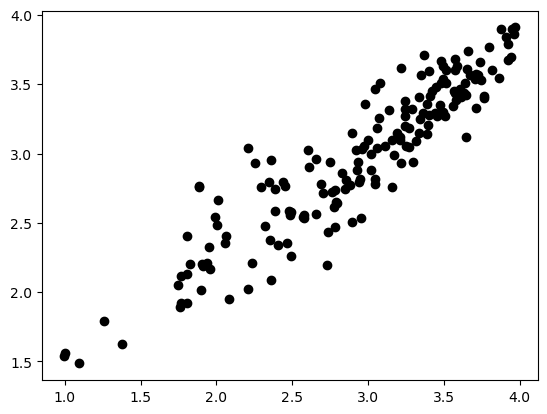

In [57]:

# visualization
plt.scatter(y_test, y_pred,  color='black')